# Ensembling Machine Learning Models

In [1]:
import os
import warnings
import numpy as np
import pandas as pd

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('../Data/data.csv')
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)

In [3]:
features = data.drop(columns=['TenYearCHD'], axis=1)
targets = data['TenYearCHD']

In [4]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import LeaveOneOut
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [5]:
loo = LeaveOneOut()
results = pd.DataFrame(columns=['true', 'lr_pred', 'rf_pred', 'dt_pred'], index=data.index)

for train, test in loo.split(features):
    X_train, y_train = features.iloc[train], targets[train]
    X_test, y_test = features.iloc[test], targets[test]
    
    lr_model = LogisticRegression(random_state=0)
    rf_model = RandomForestClassifier(random_state=0)
    dt_model = DecisionTreeClassifier(random_state=0)
    
    lr_model.fit(X=X_train, y=y_train)
    rf_model.fit(X=X_train, y=y_train)
    dt_model.fit(X=X_train, y=y_train)
    
    true = y_test[test]
    lr_pred = lr_model.predict(X=X_test)
    rf_pred = rf_model.predict(X=X_test)
    dt_pred = dt_model.predict(X=X_test)
    
    results.loc[test, 'true'] = true
    results.loc[test, 'lr_pred'] = lr_pred
    results.loc[test, 'rf_pred'] = rf_pred
    results.loc[test, 'dt_pred'] = dt_pred

# Ensemble Modelling

In [6]:
results['final'] = results['lr_pred'] + results['rf_pred'] + results['dt_pred']
results['final'][results.final!=0] = 1

In [7]:
ensemble_accuracy = accuracy_score(y_true=results.true, y_pred=results.lr_pred)
ensemble_reports = classification_report(y_true=results.true, y_pred=results.lr_pred)

print("Accuracy of Ensemble Model = {:.2f}% \n".format(ensemble_accuracy*100))
print("Ensemble Classification Report:\n", ensemble_reports)

Accuracy of Ensemble Model = 85.27% 

Ensemble Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      3101
           1       0.70      0.06      0.11       557

   micro avg       0.85      0.85      0.85      3658
   macro avg       0.78      0.53      0.51      3658
weighted avg       0.83      0.85      0.80      3658



# Confusion Matrix

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Normalized confusion matrix
[[0.84263141 0.15736859]
 [0.66786355 0.33213645]]


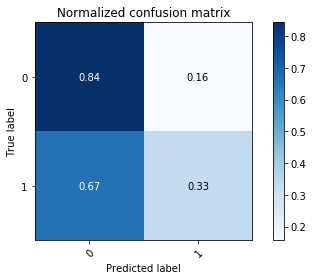

In [9]:
plot_confusion_matrix(results.true, results.final, classes=np.unique(results.true), normalize=True)

<hr>